In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%%capture
!cp -r /content/drive/MyDrive/esmini.zip /content/esmini.zip
!unzip /content/esmini.zip

In [3]:
%%capture
!apt-get install -y xvfb x11-utils
!pip install ultralytics

In [4]:
import sys, os
!wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/master/xvfb -O ../xvfb
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY")) == 0:
    !bash ../xvfb start
    os.environ['DISPLAY'] = ':1'
!cp -r /content/drive/MyDrive/xvfb /content/xvfb
!chmod 755 /content/xvfb

Starting virtual X frame buffer: Xvfb.


In [ ]:
%rm -r sim_loop

In [5]:
!/content/xvfb start
%cd /content/esmini
!chmod 755 bin/esmini
%cd /content
!git clone https://github.com/patrickw16/sim_loop.git

Starting virtual X frame buffer: Xvfb.
/content/esmini
/content
Cloning into 'sim_loop'...
remote: Enumerating objects: 3585, done.
remote: Counting objects: 100% (537/537), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 3585 (delta 462), reused 493 (delta 435), pack-reused 3048 (from 1)
Receiving objects: 100% (3585/3585), 87.16 MiB | 31.69 MiB/s, done.
Resolving deltas: 100% (3111/3111), done.
Updating files: 100% (3322/3322), done.


In [6]:
#!git clone ........
%cd odd_coverage
!git checkout ThreeDimensional
%cd /content

Cloning into 'odd_coverage'...
remote: Enumerating objects: 2809, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 2809 (delta 26), reused 28 (delta 11), pack-reused 2758 (from 1)
Receiving objects: 100% (2809/2809), 44.42 MiB | 19.41 MiB/s, done.
Resolving deltas: 100% (2232/2232), done.
Updating files: 100% (4838/4838), done.
/content/odd_coverage
Branch 'ThreeDimensional' set up to track remote branch 'ThreeDimensional' from 'origin'.
Switched to a new branch 'ThreeDimensional'
/content


In [7]:
%%capture
!sudo apt install texlive texlive-latex-extra texlive-fonts-recommended dvipng
!pip install latex
!sudo apt install cm-super

I will break since no more clusters in red zone.
I successfully finished. There are 1 successful attempts.
Gradient:-1.0798281050662586
b value:0.033912528587782695
[[31.31618263 35.55256677  5.34922418]
 [36.07229013 18.7311953   5.75807682]
 [35.37788607 37.97893394  3.38969491]
 [23.88133293 13.55377078  3.11677078]
 [47.60499261 38.259354    5.54573468]
 [46.71404365 24.26483263  3.83262013]
 [15.52177834 23.61945808  4.98484037]
 [54.34505805 36.10387378  6.81437799]
 [25.39184142 16.56233964  5.06776673]
 [57.14562558 17.75401787  4.49424078]
 [15.6612206  28.83022978  3.508375  ]
 [19.72114235 34.97227903  6.93526824]
 [27.92512598 21.44350131  4.05476602]
 [37.77970551 33.55686853  4.42933728]
 [42.60638171 27.81535489  5.40694312]
 [55.59064121 28.10767478  3.33202205]
 [16.49835629 12.39305972  6.15422502]
 [24.12271882 12.38620605  4.08644873]
 [21.41087511 36.09577192  4.13659624]
 [51.16404853 13.17865679  5.45436448]
 [14.90101852 27.07790732  6.52042523]
 [43.80825872 24

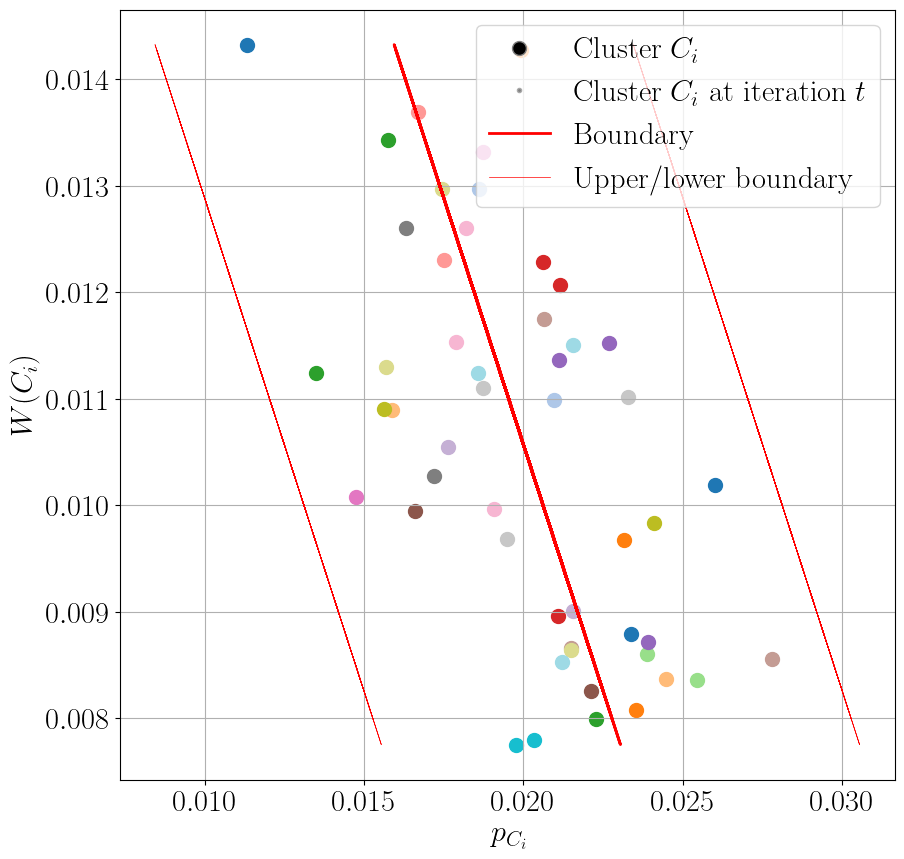

In [8]:
# Generate variance bounded test cases
import numpy as np
from PIL import Image
from IPython.core.display import SVG
from sim_loop.evaluation.cube_based_evaluation import CubeBasedEvaluation
from odd_coverage.odd_coverage.coverage_param_lvl.coverage_param_lvl import CoverageParamLvl

#Generate evaluation points:
my_coverage_param = CoverageParamLvl(
                    number_of_test_values=50,
                    trace_epsilon=0.0075,
                    epsilon_buffer=0.005,
                    number_of_attempts=1,
                    combined_points_data_path='./sim_loop/evaluation/variance_bounded_testing_method/data/prior_points_s_delta_v_delta_ego_max_dec.npy')

param_values, cov_contribution, updated_cluster_traces, adapted_kmeans_labels, re_sampled_scaled, scaler, weighted_within_variance = my_coverage_param.get_optimised_values(plot_path='/content/var_poc_3d_example.svg')

print(param_values)

points = scaler.inverse_transform(re_sampled_scaled)

#SVG(filename='/content/var_poc_3d_example.svg')

In [9]:
# Generate scenarios
from sim_loop.evaluation.variance_bounded_testing_method.simulation.parameter_set_generation import modify_xml

for idx, parameter in enumerate(param_values):

    input_file = '/content/sim_loop/scenarios/cut-in.xosc'  # Replace with your input file path
    output_file = f'/content/sim_loop/scenarios/variance_bounded/{idx}_cut-in.xosc'  # Replace with your desired output file path
    new_s_delta = param_values[idx, 0]  # New value for s_delta
    new_v_delta = param_values[idx, 1]  # New value for v_delta

    modify_xml(input_file, output_file, new_s_delta, new_v_delta)

In [17]:
from multiprocessing.pool import ThreadPool
import subprocess
import sys
import os.path

# globals
launched = 0
done = 0
n_runs = 0

def print_status():
    print('Launched: {}/{} Done: {}'.format(launched, n_runs, done), end='\r', flush=True)

def launch_scenario(index):
    global launched
    global done
    launched += 1
    print_status()
    #p = subprocess.run(
    #    ['python', '/content/sim_loop/evaluation/variance_bounded_testing_method/simulation/variance_bounded_colab_execution.py'] + [f'--osc /content/sim_loop/scenarios/variance_bounded/{str(index)}_cut-in.xosc'] + ['--fixed_timestep 0.05'] + ['--headless'] + ['--window 60 60 800 400'] + [f'--logfile_path ../{str(index)}_log.txt'] + [str(param_values[idx,2])],
    #    stdout=subprocess.DEVNULL
    #)
    p = subprocess.run(
        ['python', '/content/sim_loop/evaluation/variance_bounded_testing_method/simulation/variance_bounded_colab_execution.py'] + ['--osc /content/sim_loop/scenarios/cut-in.xosc'] + ['--fixed_timestep 0.05']
    )
    done += 1
    print_status()


if __name__ == '__main__':

    n_runs = len(param_values)
    print_status()

    #with ThreadPool() as p:
    #    p. map(launch_scenario, range(n_runs))

    subprocess.run(['python', '/content/sim_loop/evaluation/variance_bounded_testing_method/simulation/variance_bounded_colab_execution.py'] + ['--osc /content/sim_loop/scenarios/cut-in.xosc'])

    print()

Launched: 0/50 Done: 0


In [ ]:
# analyze logs and store results

In [ ]:
%mkdir logs

In [ ]:
# prompt: move all log files to logs folder

import shutil
import glob

# Move all log files to the logs folder
log_files = glob.glob("*.txt")  # Find all files ending with .log in the current directory
for log_file in log_files:
  try:
    shutil.move(log_file, "logs/")  # Move the file to the logs/ directory
  except FileNotFoundError:
    print(f"Error: The 'logs' directory does not exist.")
  except shutil.Error as e:
    print(f"Error moving file {log_file}: {e}")

In [ ]:
%rm -r logs_old

In [ ]:
# prompt: zip the logs folder

import shutil
import os

def zip_logs():
  # Check if the logs directory exists
  if os.path.exists("logs"):
    try:
      shutil.make_archive("logs", "zip", "logs")
      print("Logs folder zipped successfully to logs.zip")
    except Exception as e:
      print(f"Error zipping logs folder: {e}")
  else:
    print("Error: logs folder not found.")

zip_logs()

Logs folder zipped successfully to logs.zip
